# **GLOBAL SOLUTION – SOLUÇÕES EM ENERGIAS RENOVÁVEIS E SUSTENTÁVEIS - 2° semestre de 2025**

```
Integrantes:
Giovanna Fernandes Pereira - RM: 565434
João Vitor Lima Caldeira - RM: 566541
```

* **Título:** Sala Inteligente: otimização e simulação de energias renováveis para um laboratório de aulas
* **Objetivo:** Analisar dados de consumo de uma sala/lab, identificar desperdícios, propor medidas de eficiência + simular a inclusão de painéis solares e estimar economia financeira e redução de CO₂.
Abordagem:

  *    Gerar dados sintéticos realistas de consumo horário por equipamento.
  * Análise para detectar picos e desperdícios (ex.: equipamentos ligados fora do horário).
  * Simulação do impacto de um sistema fotovoltaico e de medidas de eficiência (sensores/automação).

* Entregáveis: código, dados, README, vídeo (≤3 min) e GitHub organizado.
* Dataset utilizado: https://www.kaggle.com/datasets/mrsimple07/energy-consumption-prediction?

## **01) Instalar dependências e preparar ambiente**

In [1]:
# Célula 1 — instalar libs
!pip install --quiet pandas numpy matplotlib seaborn plotly kaggle

## **02) Inspecionar o arquivo e abrir o CSV principal**

In [2]:
# Célula 2 — encontrar CSVs e inspecionar
import glob, pandas as pd, os
csvs = glob.glob("/content/Energy_consumption.csv") + glob.glob("/content/Energy_consumption.csv", recursive=True)
print("CSV encontrados:", csvs)

# Se houver mais de um CSV, escolha qual abrir. Aqui tentamos abrir o mais provável.
if len(csvs)==0:
    raise FileNotFoundError("Nenhum CSV encontrado. Faça upload do arquivo ou baixe do Kaggle.")

csv_path = csvs[0]  # primeiro arquivo por padrão
print("Abrindo:", csv_path)
df = pd.read_csv(csv_path, low_memory=False)
print("Shape:", df.shape)
display(df.head())
print("\nColunas detectadas:")
print(df.columns.tolist())

CSV encontrados: ['/content/Energy_consumption.csv', '/content/Energy_consumption.csv']
Abrindo: /content/Energy_consumption.csv
Shape: (1000, 11)


,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732



Colunas detectadas:
['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday', 'EnergyConsumption']


## **03) Mapear colunas relevantes automaticamente (ou manualmente)**

In [3]:
# Célula 3 — mapear colunas por keywords
cols = df.columns.str.lower().tolist()

# Função auxiliar para encontrar coluna pela lista de palavras
def find_col(possible_keywords):
    for k in possible_keywords:
        for c in df.columns:
            if k in c.lower():
                return c
    return None

col_timestamp = find_col(['time','timestamp','date','datetime'])
col_temp = find_col(['temp','temperature'])
col_hum = find_col(['humid','humidity'])
col_occ = find_col(['occup','presence','people'])
col_light = find_col(['light','illum'])
col_hvac = find_col(['hvac','ac','air','cool','heating'])
col_power = find_col(['power','consumption','load','energy','kwh','watt'])
col_solar = find_col(['solar','pv','generation','gen'])

print("Mapeamento detectado:")
print("timestamp:", col_timestamp)
print("temperature:", col_temp)
print("humidity:", col_hum)
print("occupancy:", col_occ)
print("lighting:", col_light)
print("hvac:", col_hvac)
print("power/consumption:", col_power)
print("solar generation:", col_solar)

# Se nada for detectado para timestamp, peça para o usuário ajustar (mas aqui só exibimos)
if col_timestamp is None:
    raise ValueError("Não detectei uma coluna de timestamp automaticamente. Veja as colunas acima e ajuste o mapeamento manualmente.")

# parse timestamp
df[col_timestamp] = pd.to_datetime(df[col_timestamp], errors='coerce')
df = df.sort_values(col_timestamp).reset_index(drop=True)

# Mostrar primeiras linhas das colunas mapeadas
sel_cols = [c for c in [col_timestamp, col_temp, col_hum, col_occ, col_light, col_hvac, col_power, col_solar] if c is not None]
display(df[sel_cols].head())

Mapeamento detectado:
timestamp: Timestamp
temperature: Temperature
humidity: Humidity
occupancy: Occupancy
lighting: LightingUsage
hvac: HVACUsage
power/consumption: EnergyConsumption
solar generation: None


,Timestamp,Temperature,Humidity,Occupancy,LightingUsage,HVACUsage,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,5,Off,On,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1,On,On,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,2,Off,Off,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1,On,Off,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,9,Off,On,70.811732


In [27]:
# DEFININDO AS COLUNAS MANUALMENTE

col_timestamp = 'Timestamp'
col_temp = 'Temperature'
col_hum = 'Humidity'
col_occ = 'Occupancy'
col_light = 'LightingUsage'
col_hvac = 'HVACUsage'
col_power = 'EnergyConsumption'
col_solar = 'RenewableEnergy'

# Converter timestamp para datetime
df[col_timestamp] = pd.to_datetime(df[col_timestamp], errors='coerce')

# Verificar
print(df[[col_timestamp, col_power, col_occ]].head())


            Timestamp  EnergyConsumption  Occupancy
0 2022-01-01 00:00:00          75.364373          5
1 2022-01-01 01:00:00          83.401855          1
2 2022-01-01 02:00:00          78.270888          2
3 2022-01-01 03:00:00          56.519850          1
4 2022-01-01 04:00:00          70.811732          9


## **04) Normalizar e criar variáveis de consumo por equipamento (se necessário)**

In [13]:
# Célula 4 — criar total_kWh (procure col_power ou combine proxies)
import numpy as np

# Se já existe coluna de consumo/energia, tentamos usá-la
if col_power:
    # normalizar: se valores muito grandes, verificar unidade (W vs kW vs kWh)
    sample = df[col_power].dropna().iloc[:50]
    avg = sample.mean() if len(sample)>0 else None
    print("Média da coluna power/consumption amostrada:", avg)
    # heurística: se média > 1000 talvez está em W/hora, aqui vamos assumir que valores > 10 são kWh (ajuste manual se necessário)
    # Convert to kWh if likely in W
    df['total_kWh'] = df[col_power].astype(float)
    # if avg is large (e.g. > 5000) maybe it's watts -> convert: W/1000 per hour -> assume registros horários
    if avg is not None and avg > 5000:
        print("Parece estar em Watts (média alta). Convertendo para kWh assumindo 1 hora de intervalos.")
        df['total_kWh'] = df[col_power].astype(float) / 1000.0
else:
    # criar proxy somando onde possível: lighting + hvac + ... (quando existirem)
    pieces = []
    if col_light: pieces.append(df[col_light].fillna(0))
    if col_hvac: pieces.append(df[col_hvac].fillna(0))
    if col_temp and col_occ:
        # tentativa de proxy para PCs: occupancy * 1.5 kW (exemplo) -> 1.5 kWh por hora quando ocupado
        pieces.append(df[col_occ].fillna(0).astype(float) * 1.5)
    if len(pieces)==0:
        raise ValueError("Não foi possível montar total_kWh automaticamente. Ajuste mapeamento de colunas manualmente.")
    df['total_kWh'] = np.sum(pieces, axis=0)

# Visualizar total_kWh e estatísticas
display(df[[col_timestamp, 'total_kWh']].head())
print("Estatísticas total_kWh:")
print(df['total_kWh'].describe())

Média da coluna power/consumption amostrada: 77.49575019796585


,Timestamp,total_kWh
0,2022-01-01 00:00:00,75.364373
1,2022-01-01 01:00:00,83.401855
2,2022-01-01 02:00:00,78.270888
3,2022-01-01 03:00:00,56.519850
4,2022-01-01 04:00:00,70.811732


Estatísticas total_kWh:
count    1000.000000
mean       77.055873
std         8.144112
min        53.263278
25%        71.544690
50%        76.943696
75%        82.921742
max        99.201120
Name: total_kWh, dtype: float64


## **05) Agregar séries por hora/dia e visualizar padrões**

/tmp/ipython-input-1853865735.py:12: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_clean[c] = pd.to_numeric(df_clean[c], errors='ignore')
/tmp/ipython-input-1853865735.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[c] = df_clean[c].replace({
/tmp/ipython-input-1853865735.py:29: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_clean[c] = pd.to_numeric(df_clean[c], errors='ignore')
/tmp/ipython-input-1853865735.py:40: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead

Colunas numéricas sendo usadas na agregação:
['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'Holiday', 'EnergyConsumption', 'total_kWh']


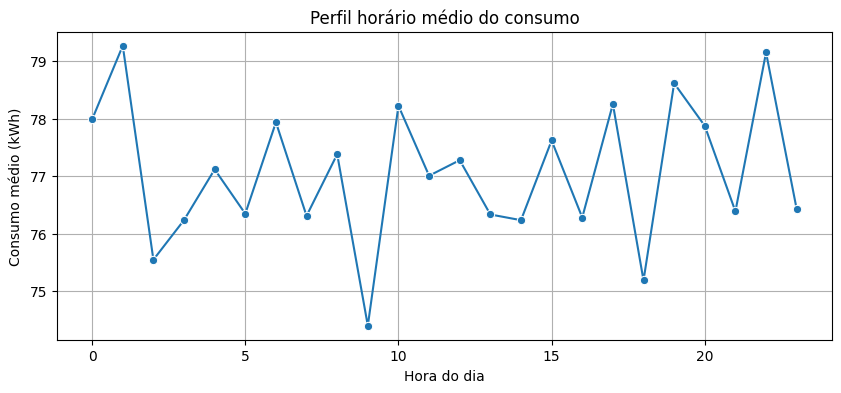

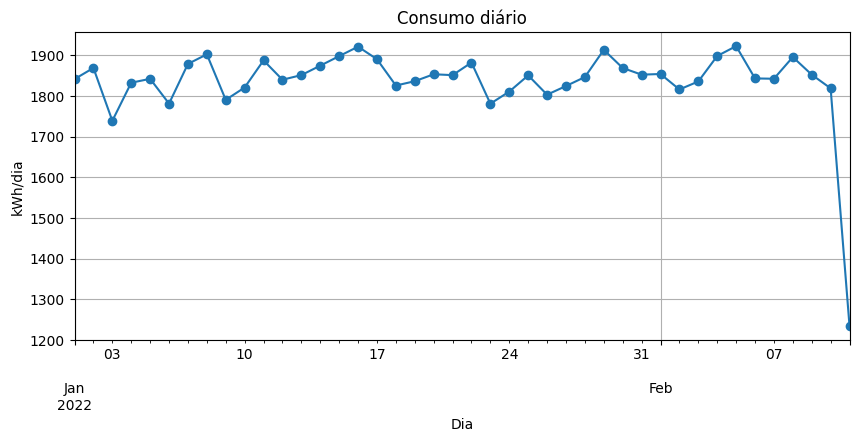

In [19]:
# Célula 5 — agregar e plotar

# Converter Timestamp para datetime apenas por segurança
df[col_timestamp] = pd.to_datetime(df[col_timestamp], errors='coerce')

# 1. Converter colunas tipo "On/Off" para 1/0
df_clean = df.copy()

for c in df_clean.columns:
    if df_clean[c].dtype == object:
        # Converter strings numéricas ("1","2","3") se existirem
        df_clean[c] = pd.to_numeric(df_clean[c], errors='ignore')

        # Converter On/Off
        df_clean[c] = df_clean[c].replace({
            'On': 1,
            'Off': 0,
            'on': 1,
            'off': 0,
            'True': 1,
            'False': 0,
            'true': 1,
            'false': 0,
            'Yes': 1,
            'No': 0
        })

        # Tentar novamente transformar em número
        df_clean[c] = pd.to_numeric(df_clean[c], errors='ignore')

# 2. Selecionar apenas colunas numéricas para agregação
numeric_cols = df_clean.select_dtypes(include=['number']).columns.tolist()

print("Colunas numéricas sendo usadas na agregação:")
print(numeric_cols)

# 3. Resample apenas das colunas numéricas
df_hourly = (
    df_clean.set_index(col_timestamp)[numeric_cols]
    .resample('H')
    .mean()
    .reset_index()
)

# 4. Criar colunas auxiliares
df_hourly['hour'] = df_hourly[col_timestamp].dt.hour
df_hourly['date'] = df_hourly[col_timestamp].dt.date

# 5. Gráfico consumo médio por hora
import matplotlib.pyplot as plt
import seaborn as sns

hourly_mean = df_hourly.groupby('hour')['total_kWh'].mean()

plt.figure(figsize=(10,4))
sns.lineplot(x=hourly_mean.index, y=hourly_mean.values, marker='o')
plt.xlabel('Hora do dia')
plt.ylabel('Consumo médio (kWh)')
plt.title('Perfil horário médio do consumo')
plt.grid(True)
plt.show()

# 6. Consumo diário
daily = df_hourly.set_index(col_timestamp)['total_kWh'].resample('D').sum()

plt.figure(figsize=(10,4))
daily.plot(marker='o')
plt.title('Consumo diário')
plt.xlabel('Dia')
plt.ylabel('kWh/dia')
plt.grid(True)
plt.show()

## **06) Identificar desperdícios — lógica simples**

In [28]:
# Célula 6 — identificar desperdício por occupancy (se a coluna existir)
if col_occ:
    occ_col = col_occ
    # garantir binário
    df_hourly[occ_col] = df_hourly[occ_col].astype(float).fillna(0)
    # definir threshold de ocupação: se >0.5 consideramos presença
    df_hourly['present'] = (df_hourly[occ_col] > 0.5).astype(int)
    # encontrar registros com consumo > média + 2*std e present==0
    thr = df_hourly['total_kWh'].mean() + 2*df_hourly['total_kWh'].std()
    waste = df_hourly[(df_hourly['total_kWh']>thr) & (df_hourly['present']==0)]
    print(f"Threshold desperdício (mean+2std): {thr:.2f} kWh")
    print("Exemplos de desperdício detectados (horários):")
    display(waste[[col_timestamp,'total_kWh', occ_col]].head(10))
    print(f"Total de horas com possível desperdício: {len(waste)}")
else:
    print("Coluna de ocupação não detectada. Para identificar desperdício manualmente, observe horários de consumo alto fora do expediente.")

Threshold desperdício (mean+2std): 93.34 kWh
Exemplos de desperdício detectados (horários):


,Timestamp,total_kWh,Occupancy


Total de horas com possível desperdício: 0


## **07) Simulação de painéis fotovoltaicos (PV)**

In [21]:
# Célula 7 — simulação PV
pv_kwp = 5.0  # ajuste se quiser experimentar 5, 8, 10 kWp
pv_kwh_per_kwp_day = 5.0  # suposição média (pode variar por local)
pv_daily = pv_kwp * pv_kwh_per_kwp_day
pv_monthly = pv_daily * 30  # aproximação 30 dias

# produção horário simplificada: distribuir a produção em um dia (6h-18h) com curva simples
import numpy as np
hours = np.arange(24)
# curva: zero fora do dia; seno entre 6h e 18h
pv_curve = np.where((hours>=6)&(hours<=18), np.sin((hours-6)/12*np.pi), 0)
pv_curve = pv_curve / pv_curve.sum()  # normalizar soma 1
# produção por hora média por dia (kWh)
pv_hourly_profile = pv_daily * pv_curve

# criar coluna de PV estimada para cada registro do df_hourly conforme hour
df_hourly['pv_kWh'] = df_hourly[col_timestamp].dt.hour.map(lambda h: float(pv_hourly_profile[h]))

# Comparar somas
period_consumption = df_hourly['total_kWh'].sum()
period_pv = df_hourly['pv_kWh'].sum()
coverage = period_pv / (period_consumption if period_consumption>0 else 1)

print(f"Consumo total período (kWh): {period_consumption:.1f}")
print(f"Produção PV estimada no período (kWh): {period_pv:.1f}")
print(f"Fração coberta (estimada): {coverage:.2%}")

Consumo total período (kWh): 77055.9
Produção PV estimada no período (kWh): 1047.5
Fração coberta (estimada): 1.36%


## **08) Simular automações (IoT virtual) — desligar equipamentos quando sem ocupação**

In [22]:
# Célula 8 — simulação de automação simples
df_auto = df_hourly.copy()

# parâmetros de economia
# ex.: quando sem presença, PCs entram em standby reduzindo 80% -> ficamos com 20% do consumo
pc_reduction_factor = 0.20
# iluminação reduz para 10% quando sem presença
light_reduction_factor = 0.10
# AC desligado quando sem presença (redução 0)
ac_reduction_factor = 0.0

# Heurística: se tiver colunas específicas, aplique redução; se não, aplicamos ao total_kWh como proxy
# preferencial: aplicar só ao trecho que corresponde a hvac/light/pc (se existirem)
applied = False
if col_light or col_hvac:
    # vamos tentar diminuir proporções baseado em presença de colunas
    # construir proxies para partes
    # lighting_proxy: se col_light existe use ele, senão assume 0.2 * total
    if col_light:
        df_auto['light_kWh'] = df_hourly[col_light].astype(float) if col_light in df_hourly.columns else 0
    else:
        df_auto['light_kWh'] = 0.2 * df_auto['total_kWh']
    if col_hvac:
        df_auto['ac_kWh'] = df_hourly[col_hvac].astype(float) if col_hvac in df_hourly.columns else 0.4 * df_auto['total_kWh']
    else:
        df_auto['ac_kWh'] = 0.4 * df_auto['total_kWh']
    # pc proxy = rest
    df_auto['pc_kWh'] = df_auto['total_kWh'] - df_auto['light_kWh'] - df_auto['ac_kWh']
    df_auto['pc_kWh'] = df_auto['pc_kWh'].clip(lower=0)
    # aplicar reduções quando present==0
    df_auto.loc[df_auto['present']==0, 'light_kWh'] *= light_reduction_factor
    df_auto.loc[df_auto['present']==0, 'pc_kWh'] *= pc_reduction_factor
    df_auto.loc[df_auto['present']==0, 'ac_kWh'] *= ac_reduction_factor
    df_auto['total_kWh_auto'] = df_auto['light_kWh'] + df_auto['pc_kWh'] + df_auto['ac_kWh']
    applied = True
else:
    # fallback: reduzir total quando sem presença
    df_auto['total_kWh_auto'] = df_auto['total_kWh']
    df_auto.loc[df_auto['present']==0, 'total_kWh_auto'] = df_auto.loc[df_auto['present']==0, 'total_kWh'] * 0.4
    applied = True

# resultados
orig = df_hourly['total_kWh'].sum()
novo = df_auto['total_kWh_auto'].sum()
economia_kwh = orig - novo
print(f"Consumo original (kWh): {orig:.1f}")
print(f"Consumo com automação (kWh): {novo:.1f}")
print(f"Economia estimada (kWh): {economia_kwh:.1f} -> {economia_kwh/orig:.2%} de redução relativa")

Consumo original (kWh): 77055.9
Consumo com automação (kWh): 71166.9
Economia estimada (kWh): 5889.0 -> 7.64% de redução relativa


## **09) Calcular economia financeira e redução de CO₂**

In [24]:
# Célula 9 — custos e emissões

# 1) Parâmetros — ajuste conforme desejar
tarifa_R = 0.80        # R$ por kWh (ex.: 0.80)
fator_emissao = 0.4    # kgCO2 por kWh (ex.: 0.4)

# 2) Checagens de existência das tabelas usadas
if 'df_hourly' not in globals():
    raise NameError("df_hourly não encontrado. Rode a etapa de agregação (etapa 6) primeiro.")
if 'df_auto' not in globals():
    raise NameError("df_auto não encontrado. Rode a etapa de simulação de automação (etapa 9) primeiro.")

# 3) Calcular consumo total no período analisado
orig_kwh = df_hourly['total_kWh'].sum()
novo_kwh = df_auto['total_kWh_auto'].sum()

# 4) Custos e emissões
orig_cost = orig_kwh * tarifa_R
novo_cost = novo_kwh * tarifa_R
economia_R = orig_cost - novo_cost

orig_co2 = orig_kwh * fator_emissao
novo_co2 = novo_kwh * fator_emissao
co2_ev = orig_co2 - novo_co2

# 5) Informações sobre o período e estimativa mensal
# tenta recuperar a coluna de timestamp usada (ajuste se necessário)
ts_col = 'Timestamp' if 'Timestamp' in df_hourly.columns else df_hourly.columns[0]
period_days = (pd.to_datetime(df_hourly[ts_col]).dt.date.max() - pd.to_datetime(df_hourly[ts_col]).dt.date.min()).days + 1
if period_days <= 0:
    period_days = len(df_hourly) / 24.0  # fallback em dias

scale_to_30 = 30.0 / period_days

# 6) Impressão dos resultados
print(f"Período analisado: {period_days} dias")
print("----- Resultado para o período analisado -----")
print(f"Consumo original (kWh): {orig_kwh:.1f}")
print(f"Consumo com automação (kWh): {novo_kwh:.1f}")
print(f"Custo original: R$ {orig_cost:.2f}")
print(f"Custo com automação: R$ {novo_cost:.2f}")
print(f"Econ. no período (R$): R$ {economia_R:.2f}")
print(f"Redução CO₂ no período: {co2_ev:.1f} kg")

print("\n----- Estimativa escalada para 30 dias (aprox.) -----")
print(f"Estimativa mensal de economia: R$ {economia_R * scale_to_30:.2f}")
print(f"Estimativa mensal de CO₂ evitado: {co2_ev * scale_to_30:.1f} kg")

Período analisado: 42 dias
----- Resultado para o período analisado -----
Consumo original (kWh): 77055.9
Consumo com automação (kWh): 71166.9
Custo original: R$ 61644.70
Custo com automação: R$ 56933.52
Econ. no período (R$): R$ 4711.18
Redução CO₂ no período: 2355.6 kg

----- Estimativa escalada para 30 dias (aprox.) -----
Estimativa mensal de economia: R$ 3365.13
Estimativa mensal de CO₂ evitado: 1682.6 kg


## **10) Visualizar resultados juntos (consumo vs PV vs automação)**

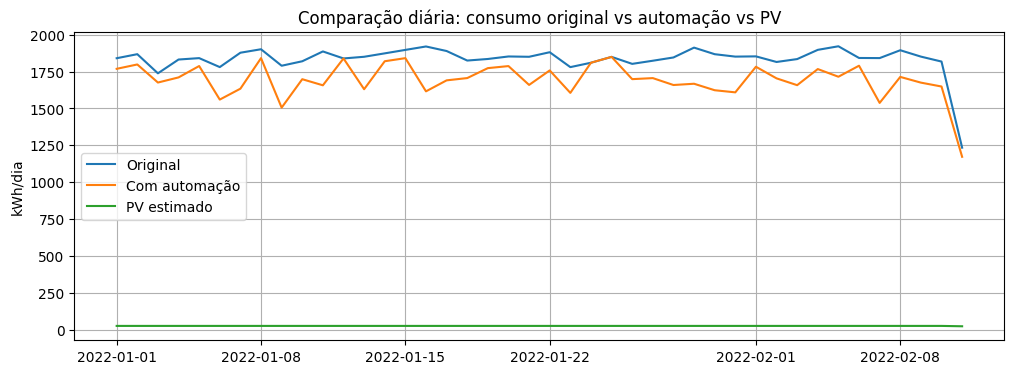

In [25]:
# Célula 10 — gráfico comparativo consumo diário: original vs com automação vs PV (diário)
daily_orig = df_hourly.set_index(col_timestamp).resample('D')['total_kWh'].sum()
daily_auto = df_auto.set_index(col_timestamp).resample('D')['total_kWh_auto'].sum()
daily_pv = df_hourly.set_index(col_timestamp).resample('D')['pv_kWh'].sum()

plt.figure(figsize=(12,4))
plt.plot(daily_orig.index, daily_orig.values, label='Original')
plt.plot(daily_auto.index, daily_auto.values, label='Com automação')
plt.plot(daily_pv.index, daily_pv.values, label='PV estimado')
plt.legend()
plt.title('Comparação diária: consumo original vs automação vs PV')
plt.ylabel('kWh/dia')
plt.grid(True)
plt.show()

## **11) Salvar artefatos para download / GitHub**

In [26]:
# Célula 11 — salvar artefatos
out_dir = "/content/sers_outputs"
import os
os.makedirs(out_dir, exist_ok=True)

df_hourly.to_csv(os.path.join(out_dir, "df_hourly.csv"), index=False)
df_auto.to_csv(os.path.join(out_dir, "df_with_automation.csv"), index=False)
daily_orig.to_csv(os.path.join(out_dir, "daily_original.csv"))
daily_auto.to_csv(os.path.join(out_dir, "daily_automation.csv"))
df_hourly[['pv_kWh']].to_csv(os.path.join(out_dir, "pv_hourly_profile.csv"))

# Zipar outputs
!zip -r /content/sers_outputs.zip /content/sers_outputs

from google.colab import files
print("Preparando download do ZIP (sers_outputs.zip)...")
files.download("/content/sers_outputs.zip")

  adding: content/sers_outputs/ (stored 0%)
  adding: content/sers_outputs/daily_automation.csv (deflated 57%)
  adding: content/sers_outputs/pv_hourly_profile.csv (deflated 81%)
  adding: content/sers_outputs/df_with_automation.csv (deflated 69%)
  adding: content/sers_outputs/df_hourly.csv (deflated 65%)
  adding: content/sers_outputs/daily_original.csv (deflated 58%)
Preparando download do ZIP (sers_outputs.zip)...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>